# Geometría de Grupos de Lie usando SageMath

## XVI Congreso Dr. Antonio Monteiro (2021)

### Silvio Reggiani (UNR - Conicet)



# Introducción

La idea de este curso es presentar, de manera informal, algunos de los conceptos básicos que se estudian en geometría Riemanniana homogénea (esto incluye grupos y álgebras de Lie). A la par iremos viendo cómo se implementan estos conceptos en el software SageMath y algunas de sus funcionalidades. En SageMath las variedades diferenciables están implementadas en el proyecto SageManifolds. 

Al momento de dictar el curso, la última versión disponible de SageMath era la versión 9.3. Sin embargo, al momento de terminar estas notas la última versión disponible es la 9.4. Estás notas están, dentro de lo posible, adaptadas a la última versión de SageMath. Las notebooks originales (así como algunas imágenes ilustrativas que no tienen la suficiente calidad como para ser incluidas en estas actas) se encuentran en el repositorio https://github.com/silvioreggiani/curso-monteiro.




In [1]:
version()

'SageMath version 10.0, Release Date: 2023-05-20'

Algunos enlaces relevantes para quienes quieran ejecutar las notebooks correspondientes son

- https://doc.sagemath.org/html/en/installation/ para la instalación de SageMath y Jupyter.
- Alternativamente, las notebooks pueden ejecutarse con una cuenta gratuita en https://cocalc.com/ (la versión gratuita es un poco lenta, pero más que suficiente para este curso).
- Para quienes no estén familiarizados con SageMath, se recomienda hacer antes algún tutorial, por ejemplo
    https://doc.sagemath.org/html/en/tutorial/index.html
- Finalmente la página oficial del proyecto SageManifolds es https://sagemanifolds.obspm.fr/. Además de la docuentación oficial, allí se pueden encontrar los cambios hechos en las últimas actualizaciones. 

Con respecto a la parte matemática, la idea de este curso es presentar los conceptos de manera informal e intuitiva. La exposición será autocontenida, pero para profundizar en los temas se recomienda estudiar los conceptos elementes de variedades diferenciables y riemannianas, esto pueden encontrarse, por ejemplo, en los primeros capítulos del libro de do Carmo, [??]

# Variedades diferenciables

Decimos que un espacio topológico $M$ es una *variedad diferenciable* de dimensión $n$ si
* tenemos coordenadas locales $x_1, \ldots, x_n$ en (un entorno abierto de) cada punto $p \in M$;
* el cambio de coordenadas $(x_1, \ldots, x_n) \mapsto (y_1, \ldots, y_n)$ es diferenciable (para nosotros diferenciablilidad significará de clase $C^\infty$)
* la topología de $M$ es *suficientemente buena* (espacio localmente euclídeo).
    
Para definir una variedad diferenciable en SageMath tenemos el comando `Manifold()`. Por ejemplo, una variedad diferenciable $M$ de dimensión $3$ la indicamos como sigue.

In [2]:
M = Manifold(3, 'M'); M

3-dimensional differentiable manifold M

Podemos pedirle a Sage que nos muestre los resultados usando \LaTeX. Sin embargo, a veces el output mostrado en \LaTeX es demasiado largo para ser mostrado correctamente. Es por eso que para hacer la exposición más amena, alteremos entre el modo \LaTeX y el modo código para mostrar los resultados.

In [3]:
%display latex
M

3-dimensional differentiable manifold M

Investiguemos un poco qué es lo que acabamos de definir.

In [4]:
#Mostramos los resultados en modo código
%display plain 
M.parent()

<class 'sage.manifolds.differentiable.manifold.DifferentiableManifold_with_category'>

Lo anterior nos dice, rápidamente hablando, que `M` es un objeto de la clase de las variedades diferenciables. No nos preocuparemos muchos por qué es lo que significa un objeto y una clase. Solo diremos que esto viene heredado de Python, que es el software en el que SageMath está escrito. Otra manera, más matemática, de entender qué es `M` para SageMath, es usando el método `.category()`

In [5]:
#Y volvemos a mostrar el output con LaTeX
%display latex 
M.category()

Category of smooth manifolds over Real Field with 53 bits of precision

Un mismo objeto puede estar en varias categorías.

In [6]:
%display plain
M.categories()

[Category of smooth manifolds over Real Field with 53 bits of precision,
 Category of differentiable manifolds over Real Field with 53 bits of precision,
 Category of manifolds over Real Field with 53 bits of precision,
 Category of topological spaces,
 Category of sets,
 Category of sets with partial maps,
 Category of objects]

Observemos que todavía no tenemos definido ningún sistema de coordenadas en $M$, y por ende la lista

In [7]:
%display latex
M.atlas() 

[]

es una lista vacía. Aquí el método `.atlas()` busca los sistemas de coordenadas definidos por el usuiario y no hay que confundirlo con el atlas maximal de una variedad diferenciable. Definamos una carta en $M$.

In [8]:
x.<x1,x2,x3> = M.chart()

Con este comando hemos definido una carta global $x: M \to \mathbb R^3$ cuyas funciones coordenadas son $x_1, x_2, x_3$. (Una explicación un poco más técnica es que `.chart()` es un método de la clase `Manifold` que usamos para definir los sistemas de coordenadas.)

Ahora vemos que el atlas de $M$ ya no está vacío.

In [9]:
M.atlas()

[Chart (M, (x1, x2, x3))]

Podemos definir un punto $p \in M$ especificando sus coordenadas en la carta que acabamos de definir y podemos mostrar $p$ de diferentes maneras.

In [10]:
p = M.point((1,-7,12), name='p')
print(p)
display(p)
display(p in M)
p.coord()

Point p on the 3-dimensional differentiable manifold M


Point p on the 3-dimensional differentiable manifold M

True

(1, -7, 12)

La variedad que acabamos de definir no es otra cosa que $\mathbb R^3$ ya que las coordenadas se mueven entre $-\infty$ y $\infty$. 

In [11]:
x.coord_range()

x1: (-oo, +oo); x2: (-oo, +oo); x3: (-oo, +oo)

En realidad, SageManifolds viene con un comando `EuclideanSpace()` que nos permite definir las variedades $\mathbb R^n$ de manera más sencilla.

In [12]:
E3 = EuclideanSpace(3)
display(E3)
E3.atlas()

Euclidean space E^3

[Chart (E^3, (x, y, z))]

Notar, sin embargo, que para Sage, `M` y `E3` son dos variedades distintas.

In [13]:
M == E3

False

De hecho, los espacios euclídeos vienen con estructras adicionales, como por ejemplo la métrica riemannina usual (inducida por el producto escalar).

Observemos que el plano $\mathbb E^2$ viene también con coordenadas polares

In [14]:
E2 = EuclideanSpace(2)
E2.atlas()

[Chart (E^2, (x, y))]

Pero no vienen cargadas por defecto, tenemos que hacerlo manualmente.

In [15]:
coord_cart = E2.cartesian_coordinates()
coord_polar = E2.polar_coordinates()
E2.atlas()

[Chart (E^2, (x, y)), Chart (E^2, (r, ph))]

Naturalmente $(r, \phi) \in \mathbb R^+ \times [0, 2\pi)$.

In [16]:
coord_polar.coord_range()

r: (0, +oo); ph: [0, 2*pi] (periodic)

Definamos un punto génerico en el plano y veamos el cambio de coordenadas.

In [17]:
p = E2.point(coord_cart[:])
display(p.coord())
p.coord(coord_polar)

(x, y)

(sqrt(x^2 + y^2), arctan2(y, x))

Observar que el método `.point()` usa la carta por defecto, que en nuestro caso son las coordenadas cartesianas. 

In [18]:
E2.default_chart()

Chart (E^2, (x, y))

Pero también podríamos definir un punto genéroco en coordenadas polares. Como ya vimos antes el método `.coord()` también usa la carta por defecto, pero podemos pedirle que nos muestre las coordenadas con respecto a cualquier carta.

In [19]:
q = E2.point(coord_polar[:],chart=coord_polar)
display(q.coord())
q.coord(coord_polar)

(r*cos(ph), r*sin(ph))

(r, ph)

Es posible graficar como se ve una carta coordenada con respecto a la otra.

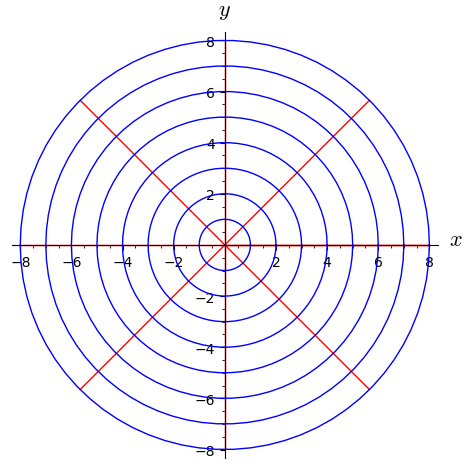

In [20]:
coord_polar.plot(coord_cart,color={coord_polar[0]:'blue', 
                                   coord_polar[1]:'red'}
                )

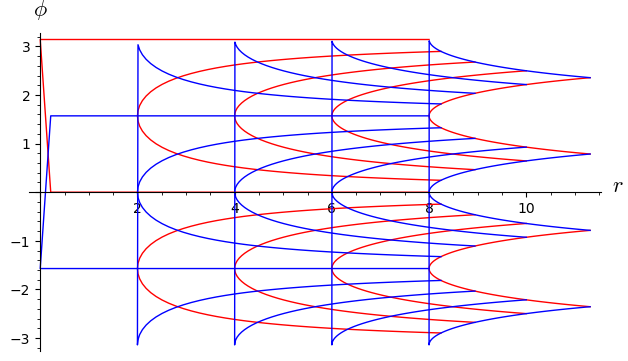

In [21]:
coord_cart.plot(coord_polar,color={coord_cart[0]:'blue',
                                   coord_cart[1]:'red'}
               )

Es interesante que el método `chart1.plot(chart2)` funciona en variedades de cualquier dimensión (obviamente, eligiendo secciones de dimensión 2 o 3 para mostrar los gráficos).

## Funciones diferenciables

Si $N$ y $M$ son dos variedades diferencibles, una función $f: N \to M$ se dice *diferenciable* si lo es cuando la escribimos en coordenadas locales. Es decir, si $x_1, \ldots, x_n$ son coordenadas locales alrededor de $p \in N$ e $y_1, \ldots, y_m$ son coordenadas locales alrededor de $f(p) \in M$, podemos pensar localmente a $f$ como una función $\mathbb R^n \to \mathbb R^m$ (y esta función es la que debe ser diferenciable).

Definamos una función $d: \mathbb R^2 \to \mathbb R$ que calcula el cuadrado de la distancia al origen. De paso, mostramos una forma distinta de definir la variedad diferenciable $\mathbb R$.

In [22]:
R.<t> = manifolds.RealLine(); 
%display latex
print(R)

Real number line ℝ


En la versión orignal de las notebooks usabamos directamente el comando `RealLine()`. En la nueva versión esto ya es obsoleto por lo que primero tenemos que cargar la recta real con `.manifolds.RealLine()`.

In [23]:
E2.<x,y> = EuclideanSpace(2); E2

Euclidean plane E^2

Hemos vuelto a definir el plano, esta vez indicando el nombre de las coordenadas, lo cual nos resulta más cómodo para definir la función $d$. Para definir una función diferenciable de `M` en `N` podemos usar `M.diff_map(N, ...)`

In [24]:
d = E2.diff_map(R, x^2+y^2)
d.display()

E^2 → ℝ
   (x, y) ↦ t = x^2 + y^2

Luego $d$ es un elemento de lo que usualmente se denota por $C^\infty(\mathbb R^2, \mathbb R)$. En el lenguaje de categorías SageMath presenta esto de la siguiente forma

In [25]:
display(d.parent())
print(d.parent()) #verbose

Set of Morphisms from Euclidean plane E^2 to Real number line ℝ in Category of smooth connected manifolds over Real Field with 53 bits of precision

Set of Morphisms from Euclidean plane E^2 to Real number line ℝ in Category of smooth connected manifolds over Real Field with 53 bits of precision


Las funciones las podemos evaluar en puntos como lo haríamos normalmente.

In [26]:
p = E2.point((-1,2))
d(p).coord()

(5,)

Los ejemplos hasta ahora son bastante simples porque las variedades que definimos son también sencillas. 
En general, para cubrir todos los puntos de una variedad diferenciable $M$ hace falta más de una carta. En estos casos, para definir una función diferenciable $f$ usando `diff_map()`, tendremos que pasar como argumentos las expresiones en coordenadas de $f$ con respecto a un subconjunto de cartas que cubra toda $M$.

En un rato veremos ejemplos de esto también.

## Curvas y vectores tangentes

Una *curva* en $M$ es una función diferenciable 
$$
c: I \to M
$$
en donde $I$ es un intervalo en $\mathbb R$. La *velocidad* de una curva, con respecto a una carta $x_1, \ldots, x_n$ se define como
$$c'(t) \mapsto (c_1'(t), \ldots, c_n'(t))
$$
en donde $c_1(t), \ldots, c_n(t)$ son las coordenadas de $c(t)$ en la carta antes mencionada. 

Es posible definir la velocidad de una curva independientemente del sistema de coordenadas, considerando la clase de equivalencia de estos vectores en $\mathbb R^n$ si se puede pasar de uno a otro vía (la matriz jacobiana de) un cambio de coordenadas. Alternativamente, esto se puede hacer considerando a los vectores tangentes como derivaciones (aplicaciones lineales que cumplen la regla de Leibniz) del álgebra de funciones diferenciables de $M$.

A modo de ejemplo una espiral de Fermat en el plano. Recordemos que en coordenadas polares una espiral de Fermat, que empieza en el orgigen, tiene la forma
$$
r = \pm a \sqrt \phi, \qquad \phi \ge 0
$$

In [27]:
R.<t> = manifolds.RealLine()
E2 = EuclideanSpace(2)
coord_cart.<x,y> = E2.cartesian_coordinates()
coord_polar.<r,ph> = E2.polar_coordinates()

Algunas aclaraciones:

* En lugar de definir la curva usando `R.diff_map(E2, ...)` es preferible hacerlo con el método `E2.curve(...)`

* Igualmente definimos la recta `R.<t> = RealLine` para que Sage cree la variable simbólica `t`

* Otra forma de hacer esto sería con `t = var('t')`

Ahora sí podemos definir nuestra curva.

In [28]:
c = E2.curve((t,t^2), (t,0,3),chart=coord_polar)
print(c)
c.display()

Curve in the Euclidean plane E^2


(0, 3) → E^2
   t ↦ (x, y) = (t*cos(t^2), t*sin(t^2))
   t ↦ (r, ph) = (t, t^2)

Observemos que SageMath nos muestra la expresión de $c$ en los dos sistemas de coordenadas disponibles. Grafiquemos la espiral de Fermat, primero en coordenadas polares

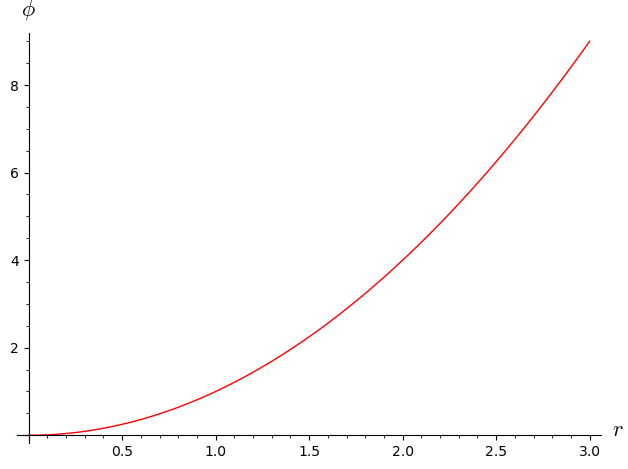

In [29]:
c.plot(coord_polar) 

y luego en coordenadas cartesianas

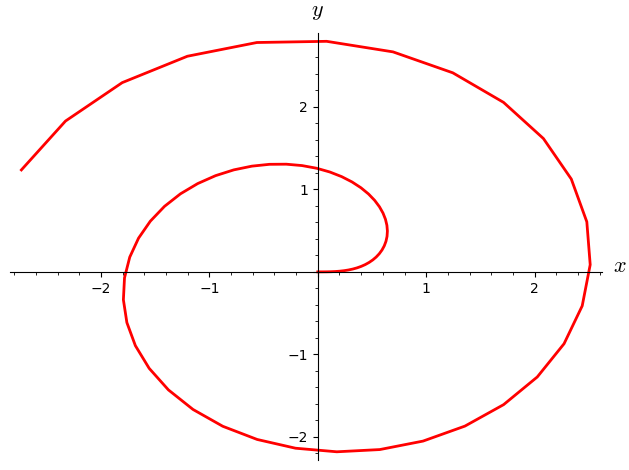

In [30]:
c1 = E2.curve(c.coord_expr(coord_cart), (t,0,3))
g1 = c1.plot(thickness=2)
show(g1)

Finalmente definamos y grafiquemos la velocidad de esta curva.

Vector field along the Real interval (0, 3) with values on the Euclidean plane E^2


(-2*t^2*sin(t^2) + cos(t^2)) e_x + (2*t^2*cos(t^2) + sin(t^2)) e_y

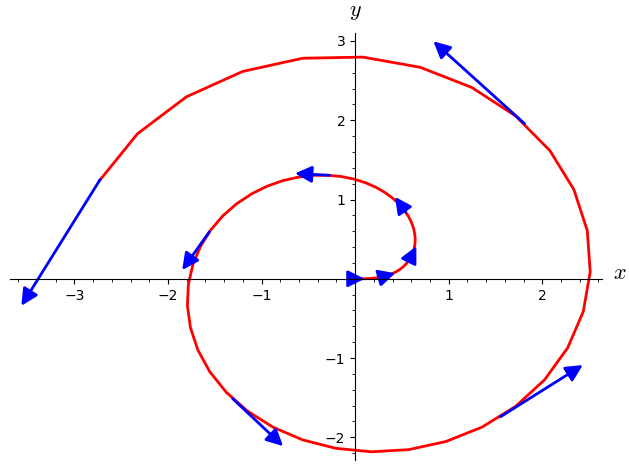

In [31]:
v = c1.tangent_vector_field()
print(v)
display(v.display())
g2 = v.plot(chart=coord_cart, number_values=10,scale=0.1)
show(g1+g2)

## Espacio tangente

Si $p \in M$, el *espacio tangente* a $M$ en $p$ se define por
\begin{equation*}
\hspace{3pc}T_pM = \{v = c'(0): c \text{ curva en } M \text{ tal que } c(0) = p\}
\end{equation*}

Dado $v \in T_pM$, podemos calcular la *derivada direccional* de una función $f: M \to \mathbb R$ en la dirección de $v$ por:
$$
v(f) = \frac{d}{dt}\bigg|_0 f(c(t))
$$
en donde $c(t)$ es una curva en $M$ tal que $c(0) = p$ y $c'(0) = v$. Esta definición no depende de la curva elegida (siempre que tenga velocidad $v$). Más aún las derivadas direccionales son independientes de las coordenadas locales. Esto último es muy importante, porque nos dice que el espacio vectorial $T_pM$ existe en cada punto y se puede "construir" independientemente de las coordenadas locales.

Veamos cómo se trabaja con los espacios tangentes en Sage. Primero definimos un punto en una variedad de dimensión $4$

In [32]:
M = Manifold(4, 'M')
M_chart.<x,y,z,w> = M.chart()
p = M.point((1,0,-5,1), name='p')

Y usamos el método `.tangent_space(p)` para acceder a $T_pM$.

In [33]:
TpM = M.tangent_space(p)
print(TpM)
TpM

Tangent space at Point p on the 4-dimensional differentiable manifold M


Tangent space at Point p on the 4-dimensional differentiable manifold M

Como $T_pM$ es un espacio vectorial, está en muchas categorías 

In [34]:
%display plain
TpM.categories()

[Category of finite dimensional vector spaces over Symbolic Ring,
 Category of finite dimensional modules over Symbolic Ring,
 Category of vector spaces over Symbolic Ring,
 Category of modules over Symbolic Ring,
 Category of bimodules over Symbolic Ring on the left and Symbolic Ring on the right,
 Category of right modules over Symbolic Ring,
 Category of left modules over Symbolic Ring,
 Category of commutative additive groups,
 Category of additive groups,
 Category of additive inverse additive unital additive magmas,
 Category of commutative additive monoids,
 Category of additive monoids,
 Category of additive unital additive magmas,
 Category of commutative additive semigroups,
 Category of additive commutative additive magmas,
 Category of additive semigroups,
 Category of additive magmas,
 Category of sets,
 Category of sets with partial maps,
 Category of objects]

Hay varios métodos interestantes para un espacio vectorial en Sage. Por ejemplo,

In [35]:
%display latex
display(TpM.dim())
display(TpM.default_basis())
vp = TpM.an_element(); vp.display()

4

Basis (∂/∂x,∂/∂y,∂/∂z,∂/∂w) on the Tangent space at Point p on the 4-dimensional differentiable manifold M

∂/∂x + 2 ∂/∂y + 3 ∂/∂z + 4 ∂/∂w

En la notación claśica el vector `vp` debería escribirse como
$$
\frac{\partial}{\partial x }\bigg|_p + 2 \frac{\partial}{\partial y }\bigg|_p + 3 \frac{\partial}{\partial z }\bigg|_p + 4 \frac{\partial}{\partial w }\bigg|_p,
$$
aquí esto no es necesario, ya que al ser `vp` un elemento de `TpM`, SageMath puede inferir que `p` es el punto base. Solamente deberemos tener un poco de cuidado de no confundirnos.

Definamos otro vector tangente

In [36]:
wp = TpM._element_constructor_([5,-2,1,0])
wp.display()

5 ∂/∂x - 2 ∂/∂y + ∂/∂z

Y veamos que efectivamente los vectores tangentes se pueden sumar.

In [37]:
display(vp + wp)
(vp + wp).display()

Tangent vector at Point p on the 4-dimensional differentiable manifold M

6 ∂/∂x + 4 ∂/∂z + 4 ∂/∂w

Ahora veamos cómo calcular las derivadas direccionales. Técnicamente hablando, en Sage podemos derivar *campos escalares* definidos sobre $M$, en lugar de funciones $M \to \mathbb R$. Desde el punto de vista matemático, estas dos cosas son lo mismo, pero para Sage `M.diff_map(R,...)` y `M.scalar_field()` son cosas distintas. 

In [38]:
R.<t> = manifolds.RealLine()
f = M.scalar_field(4*x*y + z^2 - cos(w*y))
f.display()

M → ℝ
(x, y, z, w) ↦ 4*x*y + z^2 - cos(w*y)

Para calcular la derivada direccional simplemente aplicamos el vector $v$ al campo escalar $f$.

In [39]:
vp(f)

-22

Ahora veamos que $v(f)$ coincide con $\frac{d}{dt}\big|_0 f(c(t))$ para una curva con $c(0) = p$ y $c'(0) = v$. Primero recordemos quiénes eran $p$ y $v$.

In [40]:
display(p.coord())
vp.display()

(1, 0, -5, 1)

∂/∂x + 2 ∂/∂y + 3 ∂/∂z + 4 ∂/∂w

Luego, necesitamos una curva que en el origen pase por $(1, 0, -5, 1)$ con velocidad $(1, 2, 3, 4)$.

In [41]:
c = M.curve((1 + t, 2*t , -5 + 3*t, 1 + 4*t), t)
print(c)
c.display()

Curve in the 4-dimensional differentiable manifold M


ℝ → M
   t ↦ (x, y, z, w) = (t + 1, 2*t, 3*t - 5, 4*t + 1)

Efectivamente

In [42]:
c(0) == p

True

Observemos que para calcular $c'(0)$ tenemos que evaluar `vp` en el punto `R(0)` (no lo evaluamos en $0$).

In [43]:
vc = c.tangent_vector_field()
vc.at(R(0)) == vp

True

Finalmente, hacemos

In [44]:
%display plain
f(c(t))

2*cos(t)^2*sin(4*t^2)^2 + 4*cos(4*t^2)*cos(t)*sin(4*t^2)*sin(t) + 2*cos(4*t^2)^2*sin(t)^2 + 17*t^2 - 22*t + 24

In [45]:
f(c(t)).diff(t) # derivada con respecto a t

32*t*cos(4*t^2)*cos(t)^2*sin(4*t^2) + 32*t*cos(4*t^2)^2*cos(t)*sin(t) - 32*t*cos(t)*sin(4*t^2)^2*sin(t) - 32*t*cos(4*t^2)*sin(4*t^2)*sin(t)^2 + 4*cos(4*t^2)*cos(t)^2*sin(4*t^2) + 4*cos(4*t^2)^2*cos(t)*sin(t) - 4*cos(t)*sin(4*t^2)^2*sin(t) - 4*cos(4*t^2)*sin(4*t^2)*sin(t)^2 + 34*t - 22

In [46]:
f(c(t)).diff(t).subs(t=0) # evaluada en t = 0

-22

## Diferencial de una función

Al igual que en analisis en varias variables, la *diferencial* de una función diferenciable $f: M \to N$ en el punto $p \in M$ es la transformación lineal
$$
df|_p: T_pM \to T_{f(p)}N
$$
que *mejor aproxima* a $f$. * Podemos definir la diferencial usando curvas: si $v = c'(0) \in T_pM$, entonces
$$
df|_p(v) = \frac{d}{dt}\bigg|_0 f(c(t))
$$

También podemos trabajar en coordenadas: si $x_1, \ldots, x_m$ son coordenadas en $p \in M$; $y_1, \ldots, y_m$ son  coordenadas en $f(p) \in N$ y $f_1, \ldots, f_n$ es la expresión de $f$ con respecto a este par de coordenadas, entonces la matriz de $df|_p$ con respecto a las bases $\frac{\partial}{\partial x_i}\big|_p$ y $\frac{\partial}{\partial y_j}\big|_{f(p)}$ es la matriz jacobiana
$$
  \left( \frac{\partial f_i}{\partial x_j}\bigg|_p\right)_{i, j}
$$
Sage nos permite calcular la diferencial de una función en un punto dado usando `f.differential(p)`. A modo de ejemplo calculemos la diferencial del cambio de coordenadas polares a cartesianas en el plano.

In [47]:
%display latex
R2_polar = Manifold(2, r'\mathbb R^2_\text{polar}')
polar_range = r'r:(0,+oo) theta:[0,2*pi]:periodic'
R2_polar_chart.<r,theta> = R2_polar.chart(polar_range)
R2_comun = Manifold(2, r'\mathbb R^2')
R2_comun_chart.<x,y> = R2_comun.chart()
f = R2_polar.diff_map(R2_comun, 
                      (r*cos(theta), r*sin(theta)),
                      name='f'
                     )
f.display()

f: \mathbb R^2_\text{polar} → \mathbb R^2
   (r, theta) ↦ (x, y) = (r*cos(theta), r*sin(theta))

Primero lo hacemos en un punto específico.

In [48]:
p = R2_polar.point((1,pi/4),name='p')
fp = f(p)
p.coord(), fp.coord()

((1, 1/4*pi), (1/2*sqrt(2), 1/2*sqrt(2)))

Ahora calculamos la diferencial

In [49]:
dfp = f.differential(p)
display(dfp)
print(dfp)
dfp.parent()
dfp.matrix()

Generic morphism:
  From: Tangent space at Point p on the 2-dimensional differentiable manifold \mathbb R^2_\text{polar}
  To:   Tangent space at Point f(p) on the 2-dimensional differentiable manifold \mathbb R^2

Generic morphism:
  From: Tangent space at Point p on the 2-dimensional differentiable manifold \mathbb R^2_\text{polar}
  To:   Tangent space at Point f(p) on the 2-dimensional differentiable manifold \mathbb R^2


[ 1/2*sqrt(2) -1/2*sqrt(2)]
[ 1/2*sqrt(2)  1/2*sqrt(2)]

Ahora hacemos lo mismo pero en un punto genérico.

In [50]:
r0,theta0 = var("r0 theta0")
assume(r0>0)
p = R2_polar.point((r0,theta0),name='p')
print(p)
display(p.coord())
dfp = f.differential(p)
dfp.matrix()

Point p on the 2-dimensional differentiable manifold \mathbb R^2_\text{polar}


(r0, theta0)

[    cos(theta0) -r0*sin(theta0)]
[    sin(theta0)  r0*cos(theta0)]

# Campos vectoriales

Un *campo vectorial* $X$ en $M$ asigna a cada $p \in M$ un vector tangente $X_p \in T_pM$ de manera "suave". * Si $x_1, \ldots, x_n$ son coordenadas locales tenemos asociados $n$ campos coordenados (locales) 
$$
\frac{\partial}{\partial x_1}, \, \frac{\partial}{\partial x_2}, \ldots , \frac{\partial}{\partial x_n}
$$
los cuales se corresponden con los campos constantes $e_1, e_2, \ldots, e_n$ en $\mathbb R^n$. Los campos coordenados son linealmente independientes en cada punto y por ende generan cada espacio tangente: si $v \in T_pM$, 
$$
v = \sum_{i =1}^n v_i \frac{\partial}{\partial x_i}\bigg|_p
$$
Si $f: M \to \mathbb R$, 
$$
v(f) = \sum_{i = 1}^n v_i \frac{\partial f}{\partial x_i}\bigg|_p, \qquad \text{ en donde } \frac{\partial f}{\partial x_i} = \frac{d}{dt}f(c_i(t)).
$$ 
Aquí $c_i(t)$ es la curva cuyas coordenadas son $(x_1(p), \ldots , x_i(p) + t, \ldots, x_n(p))$.
De esto último se desprende que $v_i = v(x_i)$.

Nuevamente hacemos un ejemplo en dimensión $4$.

In [51]:
M = Manifold(4, 'M')
M_chart.<x,y,z,w> = M.chart()
R.<t> = manifolds.RealLine()
f = M.scalar_field(4*x*y + z^2 - cos(w*y))

Para acceder a los campos coordenados de una carta local tenemos el método `.frame()`.

In [52]:
M_chart.frame()

Coordinate frame (M, (∂/∂x,∂/∂y,∂/∂z,∂/∂w))

Llamemos $e_0, e_1, e_2, e_3$ a estos campos coordenados y usemos esto para definir un nuevo campo $X$.

In [53]:
e0,e1,e2,e3 = M_chart.frame()
X = x*e0 - e1 + z*w*e3; X

Vector field on the 4-dimensional differentiable manifold M

Notemos que `X` aún no tiene un nombre en \LaTeX, pero esto lo podemos resolver rápidamente con `.set_name()`.

In [54]:
X.set_name('X')
display(X)
X.display()

Vector field X on the 4-dimensional differentiable manifold M

X = x ∂/∂x - ∂/∂y + w*z ∂/∂w

Ahora calculemos la derivada direccional $X(f)$.

In [55]:
display(f)
display(f.display())
display(X(f))
X(f).disp()

Scalar field on the 4-dimensional differentiable manifold M

M → ℝ
(x, y, z, w) ↦ 4*x*y + z^2 - cos(w*y)

Scalar field on the 4-dimensional differentiable manifold M

M → ℝ
(x, y, z, w) ↦ w*y*z*sin(w*y) + 4*x*y - w*sin(w*y) - 4*x

También podemos usar el método `X(f).expr()` para acceder a la expresión simbólica de $X(f)$ (por si necesitamos usarla en otro lado).

In [56]:
display(X(f).expr())
print(X(f).expr())

w*y*z*sin(w*y) + 4*x*y - w*sin(w*y) - 4*x

w*y*z*sin(w*y) + 4*x*y - w*sin(w*y) - 4*x


Esto también puede ser útil cuando queremos usar la expresión en LaTeX en algún otro lado

In [57]:
print(latex(X(f).expr()))

w y z \sin\left(w y\right) + 4 \, x y - w \sin\left(w y\right) - 4 \, x


## Flujo de campos vectoriales

Todo campo vectorial $X \in \mathfrak X(M)$ se mueve a lo largo de unas curvas llamadas *curvas integrales* o *líneas de flujo* cuya velocidad es exactamente el valor del campo en el punto dado. Más precisamente, una *curva integral* de $X$ por $p \in M$ es una curva $\gamma_p : I \subset \mathbb R \to M$ tal que $\gamma_p(0) = p$ y $\gamma_p'(t) = X_{\gamma_p(t)}$ para todo $t \in I$. Si pensamos ahora que $t$ está fijo y $p$ es quien varía obtenemos una familia de difeomorfismos locales
\begin{align*}
    \varphi_t: U \subset M \to M, && \varphi_t(p) = \gamma_p(t)
\end{align*}

El conjunto $\{\varphi_t\}$ forma un grupo (local) llamado el *flujo* de $X$ ya que
\begin{align*}
\varphi_0 = \operatorname{id}_M && \varphi_t \circ \varphi_s = \varphi_{s + t} && (\varphi_t)^{-1} = \varphi_{-t}
\end{align*}

El flujo local de un campo $X$ puede pensarse como un grupo de simetrías de $X$, pues
$$
(\varphi_t)_*(X) = X
$$
para todo $t \in I$.



## Corchete de campos vectoriales y álgebras de Lie

El conjunto $\mathfrak X(M)$ de todos los campos vectoriales en $M$ forma un un $C^\infty(M)$-módulo, ya que los campos vectoriales se pueden sumar y multiplicar por funciones diferenciables. El *corchete de Lie* en $\mathfrak X(M)$ es una de las formas que tenemos para derivar un campo en la dirección de otro. Si $X = \sum a_i \frac{\partial}{\partial x_i}$, $Y = \sum b_j \frac{\partial}{\partial x_j}$, definimos el corchete de Lie entre $X$ e $Y$ como
$$
[X, Y] = XY - YX = \sum_i \sum_j \left( a_j \frac{\partial b_i}{\partial x_j} - b_j \frac{\partial a_i}{\partial x_j}\right) \frac{\partial}{\partial x_i}
$$

Notemos que la definición de $[X, Y]$ es independiente del sistema de coordenadas, pues se tiene que aplicado una función $f \in C^\infty(M)$, vale
$$
[X, Y](f) = X(Y(f)) - Y(X(f)).
$$

$\mathfrak X(M)$ junto con el corchete de Lie forma un *álgebra de Lie* real (de dimensión infinita), ya que se cumplen
  - $[\, , \,]$ es $\mathbb R$-bilineal
  - Antisimétrico: $[X, Y] = -[Y, X]$
  - Identidad de Jacobi: $[X, [Y, Z]] + [Y, [Z, X]] + [Z, [X, Y]] = 0$

Además se satisface la regla de Leibniz: si $f \in C^\infty(M)$,
$$
[X, fY] = X(f)Y + f [X, Y]
$$

El siguiente resultado nos dice que el corchete de Lie se puede usar para detectar cuando dos campos son campos coordenadas (con respecto a alguna carta coordenada).

**Teorema.** Dos campos $X$ e $Y$ conmutan (i.e. $[X, Y] = 0$) si y sólo si sus flujos conmutan $\varphi_t^X \circ \varphi_s^Y = \varphi_s^Y \circ \varphi_t^X$

**Corolario (Teorema de Clairaut).** Los campos coordenados conmutan.

*Dem.* En realidad esto es inmediato de la definición del corchete, pero hagámoslo usando flujos a modo de ejemplo.
Como este es un teorema local, es suficiente probarlo para $M = \mathbb R^n$ y los campos coordenados $\frac{\partial}{\partial x_i} = e_i$. Aquí podemos calcular explícitamente $\varphi_t^i(p) = te_i + p$ y por ende 
$\varphi_t^i (\varphi_s^j(p)) = te_i + se_j + p = \varphi_s^j (\varphi_t^i(p))$.

Verifiquemos con Sage que los campos coordenados conmutan.

In [58]:
M = Manifold(3, 'M')
M_chart.<x,y,z> = M.chart()
M_frame = M_chart.frame()
M_frame
{X.bracket(Y).is_zero() for X in M_frame for Y in M_frame}

{True}

Pero en general dos campos cualesquiera no son conmutativos:

In [59]:
X, Y, Z = M_frame
X0, X1, X2 = (x^2 + y^2 + z^2+1)*X, (y^2 + sin(z))*Y, exp(-x*2)*Z
X0.set_name('X_0'), X1.set_name('X_1'), X2.set_name('X_2')
display(X0.bracket(X1).display())
display(X0.bracket(X2).display())
display(X1.bracket(X2).display())

[X_0,X_1] = (-2*y^3 - 2*y*sin(z)) ∂/∂x

[X_0,X_2] = -2*z*e^(-2*x) ∂/∂x - 2*(x^2 + y^2 + z^2 + 1)*e^(-2*x) ∂/∂z

[X_1,X_2] = -cos(z)*e^(-2*x) ∂/∂y

Los campos $X_0, X_1, X_2$ son linealmente independientes en cada punto y por lo tanto forman una base del espacio tangente. Esto se conoce como un *frame*. Sage nos permite definir frames que no necesariamente estén inducidos por un sistema de coordenadas. **Esto será muy importante cuando trabajemos con grupos de Lie.**

In [60]:
M_other_frame = M.vector_frame('X', [X0, X1, X2])
M.frames()

[Coordinate frame (M, (∂/∂x,∂/∂y,∂/∂z)), Vector frame (M, (X_0,X_1,X_2))]

Sin embargo, solo tenemos definido un sistema de coordenadas

In [61]:
M.atlas()

[Chart (M, (x, y, z))]

Sage chequea que el frame que queremos definir sea linealmente independiente en cada punto (aunque no es bueno confiarse demasiado).

In [62]:
M.vector_frame('X', [X0, X1, X0+X1])

ValueError: the provided vector fields are not linearly independent

# Grupos de Lie 

Un *grupo de Lie* $G$ es a la vez un grupo y una variedad diferenciable tal que las operaciones 
\begin{align*}
m: G \times G & \to G & i: G &\to G \\
(x,y) & \mapsto xy & x &\mapsto x^{-1} 
\end{align*}
son diferenciables.

Algunos ejemplos importantes son

* El grupo lineal general $GL_n(\mathbb R)$ de matrices invertibles $n \times n$. Notar que $GL_n(\mathbb R) = \det^{-1}(\mathbb R - \{0\})$ es un grupo de Lie, ya que es un abierto en $M_{n \times n}(\mathbb R) \simeq \mathbb R^{n^2}$. Muchos (casi todos) ejemplos de grupos de Lie se pueden presentar como subgrupos del grupo lineal general.
* El grupo ortogonal $O_n = \{A \in GL_n(\mathbb R): AA^T = I_n\}$ el cual es un subgrupo compacto de $GL_n(\mathbb R)$.
* El grupo lineal especial $SL_n(\mathbb R) = \{A \in GL_n(\mathbb R): \det A = 1\}$.


# Ejemplo: $SL_2(\mathbb R)$

El grupo lineal especial $SL_2(\mathbb R)$  es muy importantes en muchas áreas de la matemática. Si quisiéramos probar que $SL_2(\mathbb R)$ es una variedad diferenciable con *lapiz y papel* usaríamos el *teorema de la función implícita* para variedades (que también nos da información sobre su topología). Para definir las coordenadas en Sage de una matriz $A \in SL_2(\mathbb R)$ lo haremos *a mano* escribiendo una de las entradas de $A$ como función de las otras tres. En primer lugar, escribimos $A = \begin{pmatrix} a & b \\ c & d\end{pmatrix}$. Como $ad - bc = 1$, tenemos que $\displaystyle a \neq 0 \implies d = \frac{1 + bc}{a}$ y $\displaystyle b \neq 0 \implies c = \frac{ad - 1}{b}$. Además $SL_2(\mathbb R) = U \cup V$ con  $U \simeq \{(a, b, c) \in \mathbb R^3: a \neq 0\}$ y $V \simeq \{(a,b,d) \in \mathbb R^3 : b \neq 0\}$. Los símbolos $\simeq$ anteriores los hemos usado para indicar difeomorfismo (una función diferenciable biyectiva con inversa diferenciable).

Veamos nuestro primer ejemplo de una variedad diferenciable que no podemos cubrir con un solo sistema de coordenadas. En primer lugar, debemos definir los abiertos $U$ y $V$ usando el método `.open_subset()` y luego indicamos que con estos dos abiertos ya tenemos todos los puntos de $SL_2(\mathbb R)$ usando `.declare_union()`.

In [63]:
SL2 = Manifold(3, name=r"SL_2(\mathbb R)")
U = SL2.open_subset("U")
V = SL2.open_subset("V")
SL2.declare_union(U, V)
display(U.union(V))
display(SL2.open_cover_family())

3-dimensional differentiable manifold SL_2(\mathbb R)

Set {{SL_2(\mathbb R)}, {U, V}} of objects of the 3-dimensional differentiable manifold SL_2(\mathbb R)

Ahora definimos las coordenadas en $U$ y $V$ como hicimos más arriba

In [64]:
rest_a = lambda a00,a01,a10: a00!=0
rest_b = lambda b00,b01,b11: b01!=0
a.<a00,a01,a10> = U.chart(coord_restrictions=rest_a)
b.<b00,b01,b11> = V.chart(coord_restrictions=rest_b)

Vale la pena aclarar que el parámetro `coord_restrictions` es usado precisamente para indicar las coordenadas que queremos que sean no nulas en $U$ y en $V$. En versiones anteriores de SageMath esto se hacía con el método `.add_restrictions()` que ahora es obsoleto.

Ahora tenemos un atlas con dos sistemas de coordenadas:

In [65]:
SL2.atlas()

[Chart (U, (a00, a01, a10)), Chart (V, (b00, b01, b11))]

pero Sage aún piensa que $U$ y $V$ son abiertos disjuntos. Para resolver esto tenemos que definir el cambio de coordenadas. 

Si en la matriz $A = \begin{pmatrix} a & b \\ c & d\end{pmatrix}$ tenemos que $a \neq 0$ y $b \neq 0$ tendremos que
\begin{align*}
a_{00}(A) = a, && a_{01}(A) = b, && a_{10}(A) = c \\
b_{00}(A) = a, && b_{01}(A) = b, && b_{11}(A) = d
\end{align*}
Luego
\begin{align*}
b_{00} = a_{00}, && b_{01} = a_{01}, && b_{11} = \frac{1 + a_{01}a_{10}}{a_{00}}
\end{align*}
Para explicitar como son las coordenadas de `b` como función de las coordenadas de `a` usamos `a.transition_map(b, ...)`

In [66]:
a_to_b = a.transition_map(b,
                         (a00, a01, (1+a01*a10)/a00),
                         intersection_name='W',
                         restrictions1= [a00!=0,a01!=0],
                         restrictions2 = [b00!=0,b01!=0]
                         )
a_to_b.display()

b00 = a00
b01 = a01
b11 = (a01*a10 + 1)/a00

Para el otro cambio de coordenadas podemos usar el método `inverse()`.

In [67]:
b_to_a = a_to_b.inverse()
b_to_a.display()

a00 = b00
a01 = b01
a10 = (b00*b11 - 1)/b01

Ahora aparecen nuevos sistemas de coordenadas en nuestro atlas, por que en la intersección de los dominios de dos cartas coordendas, tenemos definidas dos tipos de coordenadas.

In [68]:
SL2.atlas()

[Chart (U, (a00, a01, a10)),
 Chart (V, (b00, b01, b11)),
 Chart (W, (a00, a01, a10)),
 Chart (W, (b00, b01, b11))]

Veamos un ejemplo de un elemento de `SL2` que no está en dicha intersección.

In [69]:
A = SL2.point((0,16,-7),chart=b)
display(A in U)
display(A in V)

False

True

Podemos armar un pequeño programa que nos de la representación matricial de los elementos de `SL2`.

In [70]:
def SL2_to_mat(M):
    if M in U:
        M00,M01,M10 = M.coord(chart=a)
        M11 = (1+M01*M10)/M00
    else:
        M00,M01,M11 = M.coord(chart=b)
        M10 = (M00*M11-1)/M01
    return matrix(2,2,[M00,M01,M10,M11])

In [71]:
A_mat = SL2_to_mat(A); A_mat

[    0    16]
[-1/16    -7]

Con la representación matricial podemos usar todos los métodos que Sage tiene definidos para matrices. Por ejemplo:

In [72]:
display(A_mat.parent())
display(A_mat.det())
display(A_mat.characteristic_polynomial())
A_mat.inverse()

Full MatrixSpace of 2 by 2 dense matrices over Rational Field

1

x^2 + 7*x + 1

[  -7  -16]
[1/16    0]

También podemos escribir un programa reciba matrices de determinante 1 y devuelva puntos de `SL2`.

In [73]:
def mat_to_SL2(A):
    """
    Atención: este programa no chequea si A.det(1) == 1, 
    tampoco chequea si los coeficientes de A son reales.
    """
    if A[0,0] != 0:
        return SL2.point((A[0,0],A[0,1],A[1,0]),chart=a)
    else:
        return SL2.point((A[0,0],A[0,1],A[1,1]),chart=b)

In [74]:
A_mat = matrix(2,2,[0,1,-1,2]); A_mat

[ 0  1]
[-1  2]

In [75]:
A = mat_to_SL2(A_mat)
display(A in U)
display(A in V)
A.coord(b)

False

True

(0, 1, 2)

**Ejercicio.** ¿Qué pasaría si hacemos `A.coord()`?

# Campos invariantes a izquierda

Si bien, en general, los grupos de Lie no se pueden cubrir con una sola carta, siempre dispondremos de un frame global de campos *invariantes a izquierda*. Si $G$ es un grupo de Lie, $e \in G$ es elelemento neutro y $v \in T_eG$. El campo invariante a izquierda $X^v$ inducido por $v$ se define como
$$
X^v|_g = dL_g|_e v = \frac{d}{dt} \bigg|_0 g \cdot c(t), \qquad g \in G,
$$
en donde $c(0) = e$ y $c'(0) = v$.

El corchete de Lie de dos campos invariantes a izquierda es nuevamente invariante a izquierda. Más aún,
$$
\mathfrak g = \{X \in \mathfrak X(G): X \text{ es invariante a izquierda}\}
$$
es una subálgebra de Lie de dimensión finita $\dim \mathfrak g = \dim G$ de $\mathfrak X(G)$, llamada el *álgebra de Lie de* $G$. El álgebra de Lie es la versión infinitesimal de un grupo de Lie y todo grupo de Lie queda determinado localmente por su álgebra de Lie.

Tratemos de definir un campo invariante a izquierda en `SL2` (esta es una de esas cosas que es más fácil de hacer en papel que en Sage). En primer lugar, notemos que el álgebra de Lie $\mathfrak{sl}_2(\mathbb R)$ de $SL_2(\mathbb R)$ queda determinada por $T_ISL_2(\mathbb R)$.

**Ejercicio:** La derivada en $t = 0$ de una curva de matrices de determinante $1$ que en $0$ pasa por $I$ tiene traza $0$. Es decir, 
$$
T_ISL_2(\mathbb R) = \{X \in M_{2 \times 2}(\mathbb R): \operatorname{tr}A = 0\}.
$$ 

Tomemos, por ejemplo, 
$$
v = c'(0) = 
\begin{pmatrix} 0 & 1 \\
0 & 0 
\end{pmatrix}, \qquad \text{ donde } c(t) = 
\begin{pmatrix} 1 & t \\ 
0 & 1 
\end{pmatrix}
$$

Sea $X$ el campo invariante a izquierda tal que $X_I = v$. Calculemos $X_A$ con $A = \begin{pmatrix} a & b \\ c & d\end{pmatrix}$:
$$
\frac{d}{dt}\bigg|_0 A \cdot c(t) = \frac{d}{dt}\bigg|_0 
\begin{pmatrix}
a & at + b \\
c & ct + d
\end{pmatrix}
$$

Para ver cuáles son las componentes de $X$ tenemos que trabajar en coordenadas. Si $A \in U$, 
$$\frac{d}{dt}\big|_0 (a, at + b, c) = (0, a, 0).$$
Por otro lado, si $A \in V$, 
$$\frac{d}{dt}\big|_0 (a, at + b, ct + d) = (0, a, c) = (0, a, (ad - 1)/b ).$$


Primero inicializamos un campo `X`

In [76]:
X = SL2.vector_field(name='X')
X.parent()

Module X(SL_2(\mathbb R)) of vector fields on the 3-dimensional differentiable manifold SL_2(\mathbb R)

y luego indicamos cuáles son sus coeficientes según los campos coordenados:

In [77]:
X[a.frame(),:] = [0,a00,0]
X[b.frame(),:] = [0,b00,(b00*b11-1)/b01]
display(X.display(a))
display(X.display(b))

X = a00 ∂/∂a01

X = b00 ∂/∂b01 + (b00*b11 - 1)/b01 ∂/∂b11

Por la forma en que lo definimos, ya sabemos que $X$ es invariante a izquierda. A modo de ejemplo, verifiquemos con alguna matriz $A$ que
$$
X_A = dL_A|_I(X_I)
$$

In [78]:
A = SL2.point((1,0,2),name='A')
display(SL2_to_mat(A))
display(A in U)
display(A in V)

[1 0]
[2 1]

True

False

Para calcular $L_A : SL_2(\mathbb R) \to SL_2(\mathbb R)$ necesitamos saber cuáles son las coordenadas de $AB$ para cualquier $B \in SL_2(\mathbb R)$. En este caso tenemos una pequeña ventaja, ya que $L_A(U) \subset U$ y $L_A(V) \subset V$.

Un punto genérico en $U$ se puede obtener como sigue.

In [79]:
assume(a00!=0,b01!=0) #para que las coordenadas sean válidas
SL2.point(a[:])
SL2_to_mat(A), SL2_to_mat(SL2.point(a[:]))

(
[1 0]  [              a00               a01]
[2 1], [              a10 (a01*a10 + 1)/a00]
)

Ahora podemos multiplicar normalmente las matrices

In [80]:
SL2_to_mat(A) * SL2_to_mat(SL2.point(a[:]))

[                      a00                       a01]
[              2*a00 + a10 2*a01 + (a01*a10 + 1)/a00]

y luego volver a `SL2` con `mat_to_SL2`

In [81]:
mat_to_SL2(SL2_to_mat(A) * SL2_to_mat(SL2.point(a[:]))).coord() 

(a00, a01, 2*a00 + a10)

Una forma fácil de obtener las coordenadas en el formato apropiado es usar `print()` y luego copiarlas.

In [82]:
print(_)

(a00, a01, 2*a00 + a10)


Hacemos lo mismo con los puntos de $V$ (teniendo cuidado de usar las coordenadas de la carta `b`).

In [83]:
print(mat_to_SL2(SL2_to_mat(A) * \
                 SL2_to_mat(SL2.point(b[:],b))).coord(b))

(b00, b01, 2*b01 + b11)


Ya estamos en condiciones de definir el difeomorfismo $L_A$ ya que conocemos la expresión en todos los sistemas de coordenadas.

In [84]:
LA = SL2.diff_map(SL2,{(a,a):(a00, a01, 2*a00 + a10),
             (b,b):(b00, b01, 2*b01 + b11)},name="L_A")
LA.display()

L_A: SL_2(\mathbb R) → SL_2(\mathbb R)
on U: (a00, a01, a10) ↦ (a00, a01, 2*a00 + a10)
on V: (b00, b01, b11) ↦ (b00, b01, 2*b01 + b11)

Definimos la matriz identidad.

In [85]:
I2 = SL2.point((1,0,0),name='I_2')
display(SL2_to_mat(I2))
LA(I2)== A #chequeamos A * I2 = A

[1 0]
[0 1]

True

Calculamos la diferencial $dL_A|_{I_2} : T_{I_2} SL_2(\mathbb R) \to T_A SL_2(\mathbb R)$

In [86]:
dLA = LA.differential(I2)
display(dLA.parent())
dLA.matrix()

Set of Morphisms from Tangent space at Point I_2 on the 3-dimensional differentiable manifold SL_2(\mathbb R) to Tangent space at Point L_A(I_2) on the 3-dimensional differentiable manifold SL_2(\mathbb R) in Category of finite dimensional vector spaces over Symbolic Ring

[1 0 0]
[0 1 0]
[2 0 1]

Y finalmente chequeamos que $dL_A|_{I_2} X_{I_2} = X_A$

In [87]:
dLA(X.at(I2)) == X.at(A)

True

### Ejercicio

1) Escribir una función `left_translation(A)` que reciba un elemento $A \in SL_2(\mathbb R)$ y devuelva la traslación a izquierda $L_A: SL_2(\mathbb R) \to SL_2(\mathbb R)$.

2) Definir un frame invariante a izquierda en `SL2`.

# Teoría de Lie en 2'

## Teorema de Ado

Toda álgebra de Lie (real) de dimensión finita es isomorfa a una subálgebra de Lie de $\mathfrak{gl}_n(\mathbb R)$ para algún $n$. Es decir, toda álgebra de Lie puede penarse como una subálgebra de matrices con respecto al corchete
$$
[A, B] = AB - BA
$$

## Álgebras de Lie semisimples y solubles

Hay dos clases distinguidas de álgebras de Lie de dimensión finita: las algebras de Lie *(semi)simples* y las álgebras de Lie *solubles*. Las álgebras de Lie semimples son las "más sencillas", están clasificadas y de esta [clasificación](https://en.wikipedia.org/wiki/Semisimple_Lie_algebra) sabemos que hay una cantidad finita en cada dimensión. Por otro lado las álgebras de Lie solubles pueden presentarse como subálgebras de matrices triangulares, aunque son bastante más complicadas de describir. No existe una clasificación completa y se sabe que hay familias infinitas de álgebras solubles no isomorfas en una misma dimensión (a partir de dimensión 3).

El **Teorema de descomposición de Levi** nos dice que toda álgebra de Lie $\mathfrak g$ tiene una parte soluble y una parte semisimple que determinan completamente su estructura  
$$
\mathfrak g \simeq \mathfrak g_{\mathrm{sol}} \rtimes \mathfrak g_{\mathrm{ss}}
$$

## ¿Cómo pasamos del álgebra de Lie al grupo de Lie?

Si $G \subset GL_n(\mathbb R)$ es un grupo de Lie y $\mathfrak g \subset \mathfrak{gl}_n(\mathbb R)$ es su álgebra de Lie, la función exponencial nos da un difeomorfismo local entre un entorno del origen en $\mathfrak g$ y un entorno de la identidad en $G$.
\begin{align*}
\exp : \mathfrak g &\to G \\
 A & \mapsto e^A = I_n + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots
\end{align*}

Una familia muy importante de grupos/álgebras de Lie solubles son los grupos/álgebras de Lie *nilpotentes*. Si pensamos matricialmente un álgebra de Lie nilpotente, sus elementos se pueden representar con matrices triangulares estrictas. Una ventaja de los grupos de Lie solubles y, sobre todo, los nilpotentes (simplemente conexos) es que son mucho más fáciles de implementar en Sage, ya se pueden cubrir con una sola carta


**Teorema.**
1) Si $G$ es soluble simplemente conexo, entonces $G$ es difeomorfo a $\mathbb R^n$ con $n = \dim G$.

2) Si $G$ es nilpotente simplemente conexo, entonces $\exp: \mathfrak g \to G$ es un difeomorfismo. Más aún, la serie de $e^A$ es una suma finita para toda $A \in \mathfrak g$.

Sage también viene con álgebras de Lie

In [88]:
sl2 = lie_algebras.sl(QQ,2, representation='matrix')
print(sl2)
display(sl2.gens())
display(sl2.is_abelian())
display(sl2.is_semisimple())
display(sl2.is_solvable())

Special linear Lie algebra of rank 2 over Rational Field


(
[0 1]  [0 0]  [ 1  0]
[0 0], [1 0], [ 0 -1]
)

False

True

False

El ejemplo más famoso de un álgebra de Lie nilpotente es el *álgebra de Lie de Heisenberg*, la cual tiene una base $X, Y, Z$ con el único corchete no trivial
$$
[X, Y] = Z
$$

In [89]:
h = lie_algebras.Heisenberg(QQ, 1, representation="matrix"); 
print(h) 
display(h.dimension())
X, Y, Z =  h.basis()
display((X, Y, Z))
display(h.gens())
display(X.bracket(Y) == Z)
display(h.is_nilpotent())
display(h.is_semisimple())

Heisenberg algebra of rank 1 over Rational Field


3

(
[0 1 0]  [0 0 0]  [0 0 1]
[0 0 0]  [0 0 1]  [0 0 0]
[0 0 0], [0 0 0], [0 0 0]
)

(
[0 1 0]  [0 0 0]
[0 0 0]  [0 0 1]
[0 0 0], [0 0 0]
)

True

True

False

## Métricas riemannianas

Una *métrica riemanniana* $g$, a veces también denotada por $\langle\cdot,\cdot\rangle$, en una variedad diferenciable $M$ asigna a cada $p \in M$ un producto escalar $g_p$ en $T_pM$ de manera diferenciable: en coordenadas locales las funciones 
$$
g_{ij} = g\left( \frac{\partial}{\partial x_i}, \frac{\partial}{\partial x_j}\right)
$$
son funciones diferenciables. Esto permite:
* Calcular la norma de vectores tangentes (y de campos vectoriales): $\|v\| = \sqrt{g(v, v)}$
* Calcular ángulos entre vectores tangentes $g(v, w) = \|v\| \|w\| \cos \theta$, en donde $v, w \in T_pM$
* Calcular longitudes de curvas $c:[a, b] \to M$
$$
L(c) = \int_a^b \|c'(t)\| \, dt
$$

Esto hace de $M$ un espacio métrico y de hecho, la topología métrica inducida por la distancia
$$
d(p, q) = \inf_c\{L(c): c(a) = p, \, c(b) = q\}
$$
coincide con la topología de $M$.

El ejemplo más sencillo de variedad riemanniana es el espacio euclídeo (en cada punto el producto escalar es el mismo)

In [90]:
%display plain
E2.<x,y> = EuclideanSpace(2)
E2.categories()

[Join of Category of smooth manifolds over Real Field with 53 bits of precision and Category of connected manifolds over Real Field with 53 bits of precision and Category of complete metric spaces,
 Category of smooth manifolds over Real Field with 53 bits of precision,
 Category of connected manifolds over Real Field with 53 bits of precision,
 Category of connected topological spaces,
 Category of differentiable manifolds over Real Field with 53 bits of precision,
 Category of manifolds over Real Field with 53 bits of precision,
 Category of complete metric spaces,
 Category of metric spaces,
 Category of topological spaces,
 Category of sets,
 Category of sets with partial maps,
 Category of objects]

Sage utiliza la notación tensorial para representar las métricas riemannianas.

In [91]:
%display latex
display(E2.default_chart())
g = E2.metric()
g.display()

Chart (E^2, (x, y))

g = dx⊗dx + dy⊗dy

En la métrica euclídea los campos coordenados canónicos forman una base ortonormal.

In [92]:
X, Y = E2.default_frame()
display(g(X, X).display())
display(g(X, Y).display())
display(g(Y, Y).display())

g(e_x,e_x): E^2 → ℝ
   (x, y) ↦ 1

g(e_x,e_y): E^2 → ℝ
   (x, y) ↦ 0

g(e_y,e_y): E^2 → ℝ
   (x, y) ↦ 1

También podemos ver la representación matricial de la métrica (por medio de una matriz simétrica definida positiva).

In [93]:
g[:]

[1 0]
[0 1]

Calculemos a modo de ejemplo la longitud de una elipse (con respecto a la métrica euclídea).

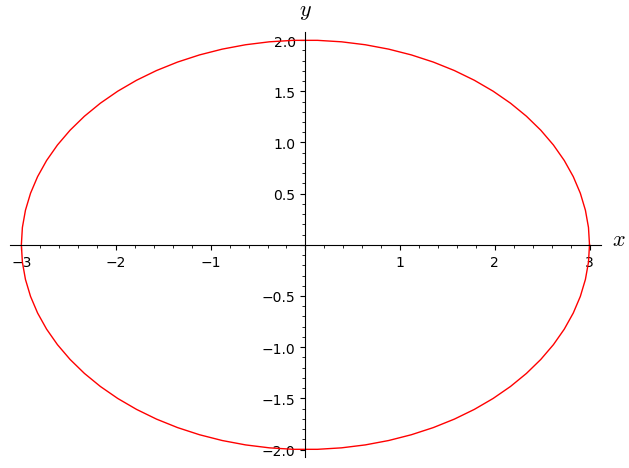

In [94]:
R.<t> = manifolds.RealLine()
c = E2.curve((3*cos(t),2*sin(t)), (t,0,2*pi), name='c')
c.plot()

Para ello integramos la norma del vector velocidad. 

In [95]:
v = c.tangent_vector_field()
display(v.display())
print(v.at(R(t)))
display(v.at(R(t)).parent())
v.at(R(t)) in E2.tangent_space(c(t))

c' = -3*sin(t) e_x + 2*cos(t) e_y

Vector c' at Point on the Euclidean plane E^2


Tangent space at Point on the Euclidean plane E^2

True

Para calcular la norma de $c'(t)$, necesitamos evaluar la métrica en $c(t)$, es decir usamos el producto interno $g_{c(t)}$ en el espacio tangente $T_{c(t)}\mathbb E^2$.

In [96]:
gt = g.at(c(t))
vt = v.at(R(t))
gt(vt,vt)

4*cos(t)^2 + 9*sin(t)^2

Finalmente integramos.

In [97]:
integrate(sqrt(gt(vt,vt)),t,0,2*pi)

integrate(sqrt(4*cos(t)^2 + 9*sin(t)^2), t, 0, 2*pi)

Si queremos una aproximación numérica podemos usar `.n()`.

In [98]:
_.n()

15.86543958929059

## Ejemplo: el plano hiperbólico $\mathbb H^2$

Usaremos la presentación del semiplano superior. Es decir, la estrucutra diferenciable es la usual heredada de $\mathbb R^2$, $\mathbb H^2 = \{(x,y): y > 0\}$ y la métrica riemanniana dada en el punto $(x, y)$ por
$$
g_{(x, y)} = \frac{1}{y^2} (dx \otimes dx + dy \otimes dy) 
$$

In [99]:
H2 = Manifold(2, name=r'\mathbb H^2', structure='Riemannian')
H2_chart.<x,y> = H2.chart(r'x:(-oo,+oo) y:(0,+oo)')
H2_chart.coord_range()

x: (-oo, +oo); y: (0, +oo)

Introducimos la métrica manualmente

In [100]:
g = H2.metric()
g[0,0] = 1/y^2
g[1,1] = 1/y^2
g.display()

g = y^(-2) dx⊗dx + y^(-2) dy⊗dy

Consideremos la siguiente curva en $\mathbb H^2$

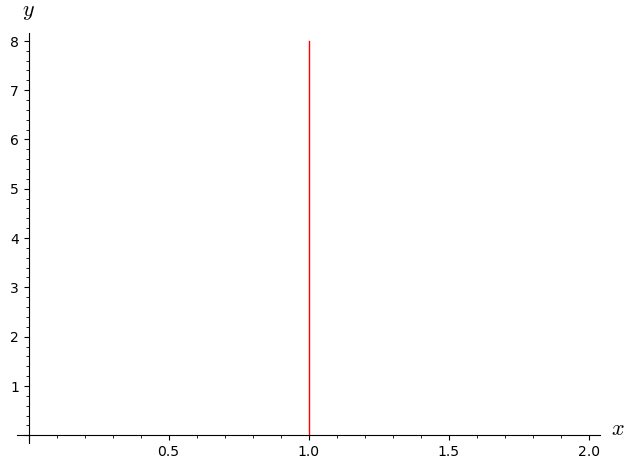

In [101]:
R.<t> = manifolds.RealLine()
gamma = H2.curve((1,t), (t,0,oo), name=r"\gamma")
v = gamma.tangent_vector_field()
gamma.plot()

Calculemos la longitud de la curva $\gamma(t)$, para $t \in [1, 8]$, con respecto a la métrica hiperbólica.

In [102]:
gt = g.at(gamma(t))
vt = v.at(R(t))
integrate(sqrt(gt(vt,vt)),t,1,8)

3*log(2)

que aproximadamente es

In [103]:
_.n()

2.07944154167984

La longitud euclídea esta curva es claramente 7. La longitud hiperbólica es menor que $7$ porque "los vectores euclídeos se ven más pequeños con la métrica hiperbólica en los puntos que tienen coordenada $y > 0$"


Sin calculáramos la longitud de $\gamma(t)$ con $t \in [\frac12,1]$ nos debería dar más grande que $\frac12$

In [104]:
display(integrate(sqrt(gt(vt,vt)),t,1/2,1))
_.n()

log(2)

2.07944154167984

# Conexión de Levi Civita

Asociada a una métrica riemanniana tenemos una *conexión*
$$
\nabla: \mathfrak X(M) \times \mathfrak X(M)  \to \mathfrak X(M), \qquad (X, Y)  \mapsto \nabla_XY
$$
llamada conexión de Levi-Civita caracterizada por las propiedades:
* $\nabla$ es $\mathbb R$ bilineal
* $\nabla$ es tensorial en la primera variable: $\nabla_{fX}Y = f \nabla_XY$, para toda $f \in C^\infty(M)$
* Se satisface la regla de Leibniz: $\nabla_X(fY) = X(f) Y + f \nabla_XY$, para toda $f \in C^\infty(M)$
* $\nabla$ es una conexión métrica: $X(g(Y, Z)) = g(\nabla_XY, Z) + g(Y, \nabla_XZ)$
* $\nabla$ es sin torsión: $\nabla_XY - \nabla_YX = [X, Y]$

Remarcamos muy rápidamente algunas similiides y diferencias entre entre el corchete de Lie y la conexión de Levi-Civita
* Ambos se generalizan para poder derivar objetos más generales que campos (tensores). 
* Sin embargo, una detecta simetrías y la otra paralelismo. Más precisamente, si $X$ es un campo:
    - $\mathcal L_X T = 0 \implies$ el flujo de $X$ preserva $T$. 
    - $\nabla_X T = 0 \implies T$ es paralelo en la dirección de $X$.
* El corchete/derivada de Lie es independiente de la métrica.
* La conexión de Levi-Civita está unívocamente determinada por la métrica.
* La conexión de Levi-Civita permite derivar objetos que estén definidos solo a lo largo de curvas. En particular, nos permite definir la aceleración de una curva (esto no se puede hacer con la derivada de Lie).

## Símbolos de Christoffel 

Si $M$ es una variedad riemanniana y $x_1, \ldots, x_n$ es una carta local, las propiedades anteriores nos dicen que para calcular $\nabla_X Y$, es suficiente con saber calcular $\nabla_{\frac{\partial}{\partial x_i}} \frac{\partial }{\partial x_j}$. Estos campos quedan determinados por los símbolos de Christoffel (en la carta dada)
$$
\nabla_{\frac{\partial}{\partial x_i}} \frac{\partial }{\partial x_j} = \sum_k \Gamma_{ij}^k \frac{\partial}{\partial x_k}
$$

Sage nos permite calcular la conexión de Levi-Civita con `g.connection()` y nos muestra los síbolos de Christoffel con `g.connection().display()`.

Por ejemplo para el plano hiperbólico:

In [105]:
nabla = g.connection()
nabla.display()

Gam^x_xy = -1/y 
Gam^x_yx = -1/y 
Gam^y_xx = 1/y 
Gam^y_yy = -1/y

Por defecto solo se muestran los símbolos de Christoffel no nulos, pero podemos pedir que se muestren todos.

In [106]:
nabla.display(only_nonzero=False)

Gam^x_xx = 0 
Gam^x_xy = -1/y 
Gam^x_yx = -1/y 
Gam^x_yy = 0 
Gam^y_xx = 1/y 
Gam^y_xy = 0 
Gam^y_yx = 0 
Gam^y_yy = -1/y

También podemos acceder a los símbolos de Christoffel usando índices, notar que $\Gamma_{ij}^k$ se calula con `nabla[i,j,k]`.

In [107]:
display([nabla[1,0,0], nabla[1,0,1], nabla[1,1,1]])

[1/y, 0, -1/y]

# Geodésicas

Una curva $\gamma(t)$ en $M$ se dice una *geodésica* si su velocidad es paralela (a veces también se dice que tiene aceleración nula, pero esto se puede prestar a confusión)
$$
\nabla_{\gamma'(t)}\gamma'(t) = 0.
$$

SageManifolds todavía no tiene implementada la derivada covariante a lo largo de curvas, pero podemos ayudarnos de los símbolos de Christoffel para estudiar la existencia de geodésicas.

## La ecuación geodésica

Si $\gamma(t)$ es una geodésica tal que $\gamma(0) = p$ y $\gamma'(0) = v \in T_pM$, se satisface
$$
\gamma_k'' + \sum_{i,j}\Gamma_{ij}^k \, \gamma_i' \, \gamma_j' = 0
$$

En particular, siempre existen las geodésicas (para $t$ pequeño) en cualquier dirección y las geodésicas son las curvas que localmente minimizan la distancia.


## Geodésicas en el plano hiperbólico

Se puede probar que las geodésicas en nuestra versión del plano hiperbólico son las semirrectas paralelas al eje $y$ y los semicírculos que intersectan perpendicularmente el eje $x$. El siguiente ejemplo fue tomado del foro de discusión de Sage y puede consultarse [aquí](https://ask.sagemath.org/question/48915/check-if-a-curve-is-a-geodesic/).

In [108]:
H2 = Manifold(2, r'\mathbb H^2', structure='Riemannian')
X.<x,y> = H2.chart(r'x y:(0,+oo)')
g = H2.metric()
g[0, 0], g[1, 1] = 1/y^2, 1/y^2
g.display()

g = y^(-2) dx⊗dx + y^(-2) dy⊗dy

Definamos la siguiete curva

\gamma: (0, pi) → \mathbb H^2
   t ↦ (x, y) = (cos(t), sin(t))

\gamma' = -sin(t) ∂/∂x + cos(t) ∂/∂y

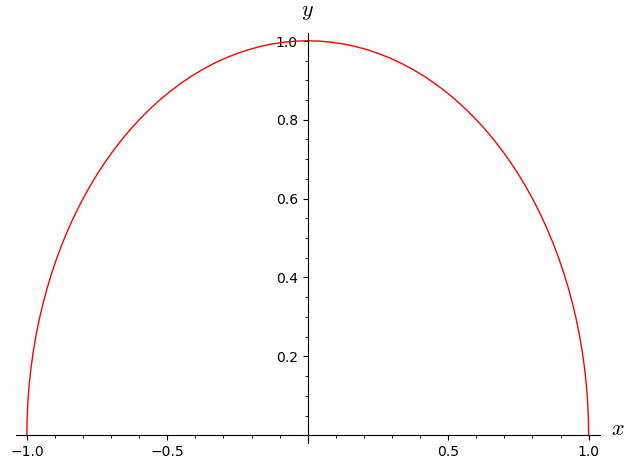

In [109]:
R.<t> = manifolds.RealLine()
gamma = H2.curve([cos(t), sin(t)], (t, 0, pi), name=r'\gamma')
display(gamma.display())
v = gamma.tangent_vector_field()
display(v.display())
gamma.plot()

Nos ayudamos de los símbolos de Christoffel para estudiar la ecuación geodésica.

In [110]:
cc = g.christoffel_symbols()
a = gamma.domain().vector_field(dest_map=gamma)
for i in H2.irange():
    a[i] = diff(v[i].expr(), t) \
           + sum(sum(cc[i, j, k](*X(gamma(t)))*v[j]\
                     .expr()*v[k].expr() 
                     for j in H2.irange()) for k in H2.irange())

print(a)
a.display()


Vector field along the Real interval (0, pi) with values on the 2-dimensional Riemannian manifold \mathbb H^2


cos(t) ∂/∂x - cos(t)^2/sin(t) ∂/∂y

Lo anterior nos dice que $\gamma(t)$ no es una geodésica. Sin embargo, sabemos que la imagen de $\gamma$ es la imagen de una geodésica en el plano hiperbólico (lo que falla entonces es la parametrización). Tratemos de encontrar cuál es esa geodésica. Primero elijamos las condiciones iniciales.

(0, 1)

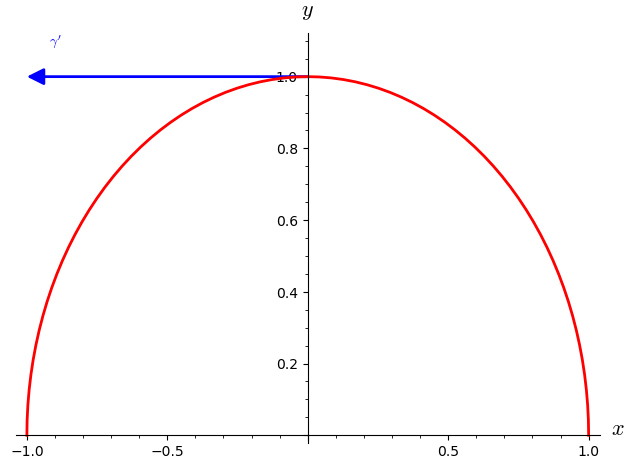

In [111]:
display(gamma(pi/2).coord())
v.at(R(pi/2)).plot() + gamma.plot(thickness=2)

A continuación definimos una cruva genérica $\gamma(t)$ con coordenadas $f_1(t), f_2(t)$. Las condiciones iniciales deberían ser
\begin{align*}
f_1(0) = 1 && f_1'(0) &= 0 \\
f_2(0) = 1 && f_2'(0) &= -1
\end{align*}

In [112]:
f1 = function('f_1')(t)
f2 = function('f_2')(t)

Lo que estamos haciendo con esto es definir expresiones simbólicas que dependen de `t`.

In [113]:
print(type(f1))

<class 'sage.symbolic.expression.Expression'>


Las cuales luego pueden ser usadas para definir una curva genérica.

In [114]:
gamma = H2.curve([f1, f2], t, name=r'\gamma')
v = gamma.tangent_vector_field()
v.display()

\gamma' = d(f_1)/dt ∂/∂x + d(f_2)/dt ∂/∂y

Aquí recibimos una amable advertencia de que el método que estamos usando para definir $\gamma$ es ahora obsoleto. 

In [115]:
cc = g.christoffel_symbols()
a = gamma.domain().vector_field(dest_map=gamma)
for i in H2.irange():
    a[i] = diff(v[i].expr(), t) \
           + sum(sum(cc[i, j, k](*X(gamma(t)))*v[j]\
                     .expr()*v[k].expr() 
                     for j in H2.irange()) for k in H2.irange())

print(a)
a.display()


Vector field along the Real number line ℝ with values on the 2-dimensional Riemannian manifold \mathbb H^2


(-2*d(f_1)/dt*d(f_2)/dt/f_2(t) + d^2(f_1)/dt^2) ∂/∂x + ((d(f_1)/dt)^2/f_2(t) - (d(f_2)/dt)^2/f_2(t) + d^2(f_2)/dt^2) ∂/∂y

Habría que resolver estas ecuaciones diferenciales, pero lo vamos a dejar acá ;-)

# Isometrías

Una *isometría* entre dos variedades riemannianas es un difeomorfismo $f: M \to N$ que preserva la métrica. Es decir,  
$$
df|_p : T_pM \to T_{f(p)}N
$$
es una isometría lineal para cada $p \in M$. Se tiene que 
$$I(M) = \{f: M \to M : f\text{ es una isometría}\}$$ forma un grupo con la composición, llamado el *grupo de isometrías* de $M$. El grupo $I(M)$ tiene una topología natural llamada [toplogía compacto abierta](https://en.wikipedia.org/wiki/Compact-open_topology) y es bien conocido el siguente resultado.

**Teorema.** $I(M)$ es un grupo de Lie (con la topología compacto abierta) y si $\dim M = n$, entonces
$$
\dim I(M) \le \frac{n(n+1)}{2}
$$

Si se da la igualdad en el teorema anterior, entonces $M$ resulta ser de una clase muy especial: espacios de curvatura constante (veremos algo de esto en breve). 


El álgebra de Lie del grupo de isometrías está dada por los campos de Killing: un campo $X \in \mathfrak X(M)$ se dice un *campo de Killing* si $\nabla X$ es antisimétrica con respecto a la métrica, es decir:
$$
\langle \nabla_Y X, Z\rangle + \langle Y, \nabla_ZX\rangle = 0
$$
para todos $Y, Z \in \mathfrak X(M)$

Hay una criterio muy sencillo (en teoría) para verificar si un campo de $X$ es un campo de Killing.

**Teorema.** $X$ es de Killing sii y sólo si la derivada de Lie de la métrica en la dirección de $X$ es cero:
$$
\mathcal L_X \langle\cdot, \cdot\rangle = 0
$$

Llevaría un buen tiempo definir qué es la derivada de Lie (es la extensión de la que hablamos antes del corchete de Lie para poder derivar todo tipo de tensores). Afortunadamente, Sage sabe calcular derivadas de Lie.

Sigamos explorando el ejemplo del plano hiperbólico

In [116]:
H2 = Manifold(2, r'\mathbb H^2', structure='Riemannian')
H2_chart.<x,y> = H2.chart(r'x y:(0,+oo)')
g = H2.metric()
g[0, 0], g[1, 1] = 1/y^2, 1/y^2
nabla = g.connection()


Calculemos las derivadas de Lie de la métrica en las direcciones de los campos coordenados.

In [117]:
X, Y = H2.default_frame()
display(g.lie_derivative(X).disp())
display(g.lie_derivative(Y).disp())


0

-2/y^3 dx⊗dx - 2/y^3 dy⊗dy

De lo anterior sigue que $X = \partial / \partial x$ es un campo de Killing. Verifiquemos que efectivamente $\nabla X$ es un tensor antisimétrico

In [118]:
display(nabla(X))
nabla(X).display()

Tensor field nabla_g(∂/∂x) of type (1,1) on the 2-dimensional Riemannian manifold \mathbb H^2

nabla_g(∂/∂x) = -1/y ∂/∂x⊗dy + 1/y ∂/∂y⊗dx

Otra forma de hacer esto es observando que la matriz de $\nabla X$ es antisimétrica, con respecto al producto interno asociado a la métrica riemanniana (que en este caso es un múltiplo, que varía punto a punto) del producto interno usual)

In [119]:
g[:], nabla(X)[:], nabla(Y)[:]

(
[y^(-2)      0]  [   0 -1/y]  [-1/y    0]
[     0 y^(-2)], [ 1/y    0], [   0 -1/y]
)

# Curvatura

El *tensor de curvatura* es uno de los objetos más importantes asociados a una variedad riemanniana $M$, el cual captura casi toda la información geométrica de $M$. Usualmente denotado por $R$, es un tensor de tipo $(1,3)$, lo cual informalmente podemos pensar como una aplicación $C^\infty(M)$-multilineal: recibe tres campos y devuelve un campo
$$
R : \mathfrak X(M) \times \mathfrak X(M) \times \mathfrak X(M) \to \mathfrak X(M)
$$
y se define como
$$
R_{X, Y}Z = \nabla_X \nabla_Y Z - \nabla_Y \nabla_X Z - \nabla_{[X, Y]}Z
$$

En Sage podemos acceder al tensor de curvatura de la métrica `g` usando el método `.riemann()`.

In [120]:
Riem = g.riemann()
print(Riem)
Riem.parent()

Tensor field Riem(g) of type (1,3) on the 2-dimensional Riemannian manifold \mathbb H^2


Free module T^(1,3)(\mathbb H^2) of type-(1,3) tensors fields on the 2-dimensional Riemannian manifold \mathbb H^2

En coordenadas locales, el tensor de curvatura tiene el siguiente aspecto.

In [121]:
Riem.display()

Riem(g) = -1/y^2 ∂/∂x⊗dy⊗dx⊗dy + y^(-2) ∂/∂x⊗dy⊗dy⊗dx + y^(-2) ∂/∂y⊗dx⊗dx⊗dy - 1/y^2 ∂/∂y⊗dx⊗dy⊗dx

A veces conviene pensar al tensor de curvatura como un tensor de tipo $(0, 4)$, es decir, recibe 4 campos y devuelve una función. Esto se hace contrayendo con la métrica
$$
(X, Y, Z, W) \mapsto \langle R_{X, Y}Z, W\rangle
$$

Sage sabe hacer esto con el método `.down(g)`, pero hay que tener cuidado con los signos (ya que no hay una convención universal sobre el orden en el cual ponemos las variables del tensor de curvatura).

In [122]:
Riem1 = Riem.down(g)
print(Riem1)

Tensor field of type (0,4) on the 2-dimensional Riemannian manifold \mathbb H^2


In [123]:
Riem1.display()

-1/y^4 dx⊗dy⊗dx⊗dy + y^(-4) dx⊗dy⊗dy⊗dx + y^(-4) dy⊗dx⊗dx⊗dy - 1/y^4 dy⊗dx⊗dy⊗dx

Verifiquemos que $\langle R, \cdot\rangle$ se puede obtener con `Riem.down(g)`. En primer lugar definamos cuatro campos genéricos.

In [124]:
a0,a1,b0,b1,c0,c1,d0,d1 = var("a0,a1,b0,b1,c0,c1,d0,d1")
X1 = a0*X + a1*Y
X2 = b0*X + b1*Y
X3 = c0*X + c1*Y
X4 = d0*X + d1*Y
X1.display(), X2.display(), X3.display(), X4.display()

(a0 ∂/∂x + a1 ∂/∂y, b0 ∂/∂x + b1 ∂/∂y, c0 ∂/∂x + c1 ∂/∂y, d0 ∂/∂x + d1 ∂/∂y)

**Observación importante:** cuando decimos que $R$ es un tensor, estamos pensando en que es $C^\infty(M)$-multineal (i.e., saca funciones diferenciables multiplicando). Por ende para calcular $R_{X,Y}Z$ en un punto $p$, solo necesitamos conocer $X_p, Y_p, Z_p$.

En ese sentido es que los campos $X_1, X_2, X_3, X_4$ que definimos más arriba son genéricos, ya que son combinaciones lineales (sobre $\mathbb R$) de un frame global.

Calculamos por un lado

In [125]:
comp_1 = Riem1(X1,X2,X3,X4).expr().expand()
comp_1

-a1*b0*c1*d0/y^4 + a0*b1*c1*d0/y^4 + a1*b0*c0*d1/y^4 - a0*b1*c0*d1/y^4

por el otro

In [126]:
comp_2 = g(nabla(nabla(X3)(X2))(X1) \
           - nabla(nabla(X3)(X1))(X2), X4).expr().expand()
comp_2

a1*b0*c1*d0/y^4 - a0*b1*c1*d0/y^4 - a1*b0*c0*d1/y^4 + a0*b1*c0*d1/y^4

y verificamos que una es menos la otra.

In [127]:
comp_1 + comp_2

0

# Curvatura seccional

La curvatura seccional es la versión de la curvatura gaussiana para variedades $n$ dimensionales. De hecho, cuando $n = 2$, nos dan la misma información. La curvatura secciona $K$ en un punto $p$ de $M$ es un valor que se asigna a cada subespacio bidimensional de $T_pM$. Si $u, v$ es una base de $\mathbb V \subset T_pM$
$$
K(\mathbb V) = K(u, v) = \frac{\langle R_{u, v}v, u\rangle}{\langle u, u\rangle \langle v, v\rangle - \langle u, v\rangle^2}
$$
(se puede probar que está definición es independiente de la base elegida). Si $n \ge 3$, $K$ brinda menos información que el tensor de curvatura, pero es un invariante más sencillo.

La curvatura seccional no viene por defecto en Sage, hay que definirla. Verifiquemos que el plano hiperbólico tiene curvatura constante $-1$.

In [128]:
(Riem1(X1,X2,X1,X2) / (g(X1,X1) * g(X2,X2) - g(X1,X2)^2)).expr()

-1

Y ya que estamos, definamos una función que calcule la curvatura seccional.

In [129]:
def curv_secc(u,v):
    p = u.parent().base_point()
    M = p.parent()
    g = M.metric()
    gp = g.at(p)
    Riem = g.riemann().down(g).at(p)
    return (Riem(u,v,u,v) / \
            (gp(u,u)*gp(v,v) - gp(u,v)^2)).simplify_full()
p = H2.point(H2_chart[:])
u, v = H2_chart.frame().at(p)
curv_secc(u, v)

-1

# Espacios de curvatura constante

Son aquellos espacios en los que la curvatura seccional es independiente del punto (y del plano elegido en el espacio). Hay 3 modelos simplemente conexos de espacios de curvatura constante:

* $\mathbb R^n$ con la métrica euclídea es un espaicio de curvatura constante nula (también llamado plano o flat);

* $\mathbb S^n$ con la métrica redonda (heredada de $\mathbb R^{n+1}$) es un espacio de curvatura constante positiva;

* $\mathbb H^n$ con la métrica hiperbólica es un espacio de curvatura constante negativa.

Para terminar el curso tratemos de probar el siguiente resultado con lo que aprendimos hasta ahora

**Teorema.** Sea $M$ una variedad riemanniana simplemente conexa de dimensión 3 y curvatura constante. Entonces existe un grupo de Lie $G$ con una métrica invariante a izquierda isométrico a $M$.

## Ejemplo flat (con grupo de Lie abeliano)

Es fácil ver a mano que el espacio euclídeo $\mathbb R^3$ tiene curvatura nula. Más aún, probemos que cualquier métrica constante en $\mathbb R^3$ tiene curvatura cero (notar que $\mathbb R^3$ es un grupo de Lie abeliano y los campos coordenados usuales son invariantes a izquierda).

In [130]:
M = Manifold(3, r'\mathbb R^3', structure='Riemannian')
M_chart.<x,y,z> = M.chart()
M_frame = M_chart.frame()
g = M.metric()

Definimos las siguientes variables simbólicas para construir una métrica constante arbitraria

In [131]:
mu, nu, eta, alpha, beta, gamma \
= var("mu, nu, eta, alpha, beta, gamma")
g[0,0], g[1,1], g[2,2], g[0,1], g[0,2], g[1,2] \
= mu, nu, eta, alpha, beta, gamma
g[:] # esta matriz debe ser simétrica y definida positiva

[   mu alpha  beta]
[alpha    nu gamma]
[ beta gamma   eta]

Veamos que los campos coordenados son invariantes a izquierda.

In [132]:
x0, y0, z0 = var('x0 y0 z0')
p = M.point((x0, y0, z0))
Lp = M.diffeomorphism(M, (x + x0, y + y0, z + z0), name='L_p')
Lp.display()

L_p: \mathbb R^3 → \mathbb R^3
   (x, y, z) ↦ (x + x0, y + y0, z + z0)

$L_p$ es la traslación a izquierda en $p = (x_0, y_0, z_0)$ y su diferencial se identifica con la transformación identidad. 

In [133]:
zero = M.point((0, 0, 0))
dLp_0 = Lp.differential(zero)
dLp_0.matrix()

[1 0 0]
[0 1 0]
[0 0 1]

Como  los campos coordenados tienen coordenadas constantes en el frame `M_frame`, sigue que $dL_p$ preserva los campos invariantes a izquierda. Además, como la métrica `g` tiene coeficientes constantes en un frame invariante a izquierda, resulta una métrica invariante a izquierda.

Por último, verifiquemos que la métrica es plana.

In [134]:
Riem = g.riemann()
%time Riem.display()

CPU times: user 1.15 ms, sys: 0 ns, total: 1.15 ms
Wall time: 1.16 ms


Riem(g) = 0

## Ejemplo flat (con grupo de Lie soluble no abeliano)

Es un poco más interesante observar que existe un grupo de Lie no abeliano que admite una métrica plana. Consideremos el grupo euclídeo $E(2)$ de movimientos rígidos del plano. Se puede ver que:

* $E(2)$ es un grupo de Lie de dimensión $3$ y su estructura de grupo queda determinado por el siguiente hecho: todo movimiento rígido es composición de una traslación $T_v$, $v \in \mathbb R^2$ y una rotación $R_t$, alrededor del origen, en un ángulo $t \in \mathbb R$:
\begin{align*}
(T_v \circ R_t) \circ (T_w \circ R_s) & = (T_v \circ R_t \circ T_w \circ (R_t)^{-1}) \circ (R_t \circ R_s)  \\
& = (T_v \circ T_{R_t(w)}) \circ R_{t + s} \\
& = T_{v + R_t(w)} \circ R_{t + s}
\end{align*}

* En coordenadas $(v, t) = (x,y,t)$ el producto en el cubrimiento universal de $E(2)$ queda
$$
(x, y, t)(x', y', t') = (x + x' \cos t - y' \sin t, y + x' \sin t + y' \cos t, t + t')
$$

In [135]:
M = Manifold(3, r'\tilde E(2)',structure='Riemannian')
M_chart.<x,y,t> = M.chart()
g = M.metric()

Definimos las traslaciones a izquierda usando la fórmula anterior.

In [136]:
x0, y0, t0 = var("x0 y0 t0")
p = M.point((x0, y0, t0))
Lp = M.diffeomorphism(M, \
                      (x0+x*cos(t0)-y*sin(t0), \
                       y0+x*sin(t0)+y*cos(t0),t0+t), \
                      name='L_p')
Lp.display()

L_p: \tilde E(2) → \tilde E(2)
   (x, y, t) ↦ (x*cos(t0) - y*sin(t0) + x0, y*cos(t0) + x*sin(t0) + y0, t + t0)

Y calculamos su diferencial.

In [137]:
zero = M.point((0,0,0))
dLp_0 = Lp.differential(zero)
dLp_0.matrix()

[ cos(t0) -sin(t0)        0]
[ sin(t0)  cos(t0)        0]
[       0        0        1]

Las columnas de la matriz `dLp_0.matrix()` nos dan los coeficientes del frame invariante asociado, con respecto a `M.default_frame()`.

In [138]:
X, Y, T = M.default_frame()
L0 = M.vector_field([cos(t),sin(t),0], name='L_0')
L1 = M.vector_field([-sin(t),cos(t),0], name='L_1')
L2 = M.vector_field([0,0,1], name='L_2')
M_left_inv_frame = M.vector_frame('L',(L0,L1,L2))
M.frames()

[Coordinate frame (\tilde E(2), (∂/∂x,∂/∂y,∂/∂t)),
 Vector frame (\tilde E(2), (L_0,L_1,L_2))]

Verifiquemos que el corchete de campos invariantes a izquida es invariante a izquierda.

In [139]:
display(L0.bracket(L1).display(M_left_inv_frame))
display(L0.bracket(L2).display(M_left_inv_frame))
display(L1.bracket(L2).display(M_left_inv_frame))

[L_0,L_1] = 0

[L_0,L_2] = -L_1

[L_1,L_2] = L_0

Para definir una métrica invariante a izquierda hay que usar un pequeño truco ya que a `.metric()` no podemos pasarel el parámetro `frame=` pero a `.tensor_field()` sí. Entonces creamos un tensor `g_aux` con los mismo coeficientes que queremos para nuestra métrica en un frame invariante a izquierda y luego definimos los coeficientes de `g[i,j] = g_aux[i,j]` en el frame `M.default_frame()`. 

In [140]:
mu, nu, eta = var("mu, nu, eta")
assume(mu>0,nu>0,eta>0)
g_aux = M.tensor_field(0,2,\
                       [[mu,0,0],[0,nu,0],[0,0,eta]],\
                       frame=M_left_inv_frame,name='g_a')
g[:] = g_aux[:]
%display plain
g.display()

g = ((mu - nu)*cos(t)^2 + nu) dx⊗dx + (mu - nu)*cos(t)*sin(t) dx⊗dy + (mu - nu)*cos(t)*sin(t) dy⊗dx + (-(mu - nu)*cos(t)^2 + mu) dy⊗dy + eta dt⊗dt

La métrica es invariante a izquierda ya que tiene coeficientes constantes con respecto al frame invariante a izquierda.

In [141]:
%display latex
%time g.display(M_left_inv_frame)

CPU times: user 1.21 s, sys: 13.3 ms, total: 1.22 s
Wall time: 942 ms


g = mu L^0⊗L^0 + nu L^1⊗L^1 + eta L^2⊗L^2

Definimos el tensor de curvatura `Riem` de la métrica `g`.

In [142]:
#Long time
%time Riem = g.riemann() 

CPU times: user 6.7 s, sys: 86.8 ms, total: 6.79 s
Wall time: 4.97 s


Hacer un `Riem.display(M_left_inv_frame)` lleva mucho tiempo, podemos acelerar un poco la cosa con `Parellelism()`.

In [143]:
Parallelism().set(nproc=8)
%display plain
%time Riem.display(M_left_inv_frame)

CPU times: user 447 ms, sys: 92.5 ms, total: 540 ms
Wall time: 19.4 s


Riem(g) = 1/4*(mu^2 - 2*mu*nu + nu^2)/(eta*mu) L_0⊗L^1⊗L^0⊗L^1 - 1/4*(mu^2 - 2*mu*nu + nu^2)/(eta*mu) L_0⊗L^1⊗L^1⊗L^0 + 1/4*(mu^2 + 2*mu*nu - 3*nu^2)/(mu*nu) L_0⊗L^2⊗L^0⊗L^2 - 1/4*(mu^2 + 2*mu*nu - 3*nu^2)/(mu*nu) L_0⊗L^2⊗L^2⊗L^0 - 1/4*(mu^2 - 2*mu*nu + nu^2)/(eta*nu) L_1⊗L^0⊗L^0⊗L^1 + 1/4*(mu^2 - 2*mu*nu + nu^2)/(eta*nu) L_1⊗L^0⊗L^1⊗L^0 - 1/4*(3*mu^2 - 2*mu*nu - nu^2)/(mu*nu) L_1⊗L^2⊗L^1⊗L^2 + 1/4*(3*mu^2 - 2*mu*nu - nu^2)/(mu*nu) L_1⊗L^2⊗L^2⊗L^1 - 1/4*(mu^2 + 2*mu*nu - 3*nu^2)/(eta*nu) L_2⊗L^0⊗L^0⊗L^2 + 1/4*(mu^2 + 2*mu*nu - 3*nu^2)/(eta*nu) L_2⊗L^0⊗L^2⊗L^0 + 1/4*(3*mu^2 - 2*mu*nu - nu^2)/(eta*mu) L_2⊗L^1⊗L^1⊗L^2 - 1/4*(3*mu^2 - 2*mu*nu - nu^2)/(eta*mu) L_2⊗L^1⊗L^2⊗L^1


Otra opción sería ir pidiéndole a Sage que haga cálculos más sencillos. Por ejemplo

In [144]:
%display latex
Riem[1,0,1,0].factor()

1/4*(mu*cos(t)^2 - nu*cos(t)^2 + nu)*(mu - nu)^2/(eta*mu*nu)

nos dice que para que la métrica sea plana necesitamos que $\mu = \nu$. Y podemos empezar de nuevo...

In [145]:
g_aux = M.tensor_field(0,2,\
                       [[mu,0,0],[0,mu,0],[0,0,eta]],\
                       frame=M_left_inv_frame,name='g_a')
g[:] = g_aux[:]
%time Riem = g.riemann() #Tarda mucho menos

CPU times: user 91.9 ms, sys: 231 ms, total: 323 ms
Wall time: 422 ms


Con esto ya hacemos que la métrica sea plana

In [146]:
Riem.display()

Riem(g) = 0

Esto también lo podemos comprobar viendo que la métrica invariante a izquierda coincide con una métrica euclídea

In [147]:
g.display()
g.display(M_left_inv_frame)

g = mu L^0⊗L^0 + mu L^1⊗L^1 + eta L^2⊗L^2

## Ejemplo curvatura negativa

Para estudiar el caso del espacio hiperbólico nos ayudaremos de un resultados que son conocidos en la literatura. Consideremos el grupo de Lie soluble $G$, cuya álgebra de Lie $\mathfrak g$ admite una base $e_0, e_1, e_2$ con los corchetes dados por
\begin{align*}
[L_0, L_1] = 0, && [L_2, L_0] = L_0 && [L_2, L_1] = L_1
\end{align*}

Se puede ver que el grupo de Lie simplemente conexo asociado a esta álgebra de Lie es $\mathbb R^3$ con el producto
$$
(x, y, t)(x', y', t') = (x + e^t x', y + e^t y', t + t').
$$

Sabiendo esto, ya podemos implementarlo en Sage.

In [148]:
M = Manifold(3, 'M',structure='Riemannian')
M_chart.<x,y,t> = M.chart()
g = M.metric()
x0, y0, t0 = var("x0 y0 t0")
p = M.point((x0, y0, t0), name='p')
zero = M.point((0,0,0))
Lp = M.diffeomorphism(M, (x0+x*exp(t0),y0+y*exp(t0),t0+t), \
                      name='L_p')
Lp.display()

L_p: M → M
   (x, y, t) ↦ (x*e^t0 + x0, y*e^t0 + y0, t + t0)

**Ejecicio.** Verificar que $M$ es un grupo de Lie:

* Probar que el producto es asociativo definiendo otro punto arbitrario `q`, los difeomorfismos `Lq`, `Lpq` y chequeando que `Lp.post_compose(Lq) == Lpq`
* Probar que existen inversos verificando que `Lp.inverse() == Lq` con `q = Lp.inverse()(zero)`

Para calcular los campos invariantes a izquierda usamos el mimsmo truco que antes.

In [149]:
dLp_0 = Lp.differential(zero)
dLp_0.matrix()

[e^t0    0    0]
[   0 e^t0    0]
[   0    0    1]

Y como antes definimos un frame invariante a izquierda.

In [150]:
X, Y, T = M.default_frame()
L0 = M.vector_field([exp(t),0,0], name='L_0')
L1 = M.vector_field([0,exp(t),0], name='L_1')
L2 = M.vector_field([0,0,1], name='L_2')
M_left_inv_frame = M.vector_frame('L',(L0,L1,L2))
M.frames()

[Coordinate frame (M, (∂/∂x,∂/∂y,∂/∂t)), Vector frame (M, (L_0,L_1,L_2))]

Chequeemos el corchete de Lie satisface las relaciones propuestas

In [151]:
display(L0.bracket(L1).display(M_left_inv_frame))
display(L2.bracket(L0).display(M_left_inv_frame))
display(L2.bracket(L1).display(M_left_inv_frame))

[L_0,L_1] = 0

[L_2,L_0] = L_0

[L_2,L_1] = L_1

Para hacer las cuentas más sencillas (y breves) consideramos métricas diagonales.

In [152]:
mu, nu, eta = var("mu, nu, eta")
assume(mu>0,nu>0,eta>0)
g_aux = M.tensor_field(0,2,[[mu,0,0],[0,nu,0],[0,0,eta]],
                       frame=M_left_inv_frame,name='g_a')
g[:] = g_aux[:]
display(g.display())
g.display(M_left_inv_frame)

g = mu*e^(-2*t) dx⊗dx + nu*e^(-2*t) dy⊗dy + eta dt⊗dt

g = mu L^0⊗L^0 + nu L^1⊗L^1 + eta L^2⊗L^2

In [153]:
%time Riem = g.riemann()

CPU times: user 265 ms, sys: 297 ms, total: 562 ms
Wall time: 889 ms


Con esto ya podemos calcular la curvatura seccional y verificar que $M$ es un espacio de curvatura constante negativa.

In [154]:
u0,u1,u2,v0,v1,v2 = var("u0,u1,u2,v0,v1,v2")
u = u0 * L0.at(p) + u1 * L1.at(p) + u2 * L2.at(p)
v = v0 * L0.at(p) + v1 * L1.at(p) + v2 * L2.at(p)
curv_secc(u, v)

-1/eta

# Ejemplo: curvatura positiva

Esto lo vamos a dejar como un ejercicio para quien esté interesado. La idea es la siguiente. Consideramos la inmersión $\mathbb S^3 \hookrightarrow \mathbb R^4$. La métrica en $\mathbb S^3$ es la inducida de $\mathbb R^4$, vía la identificación
$$
T_p\mathbb S^3 = \{p\}^\perp = \{v \in \mathbb R^4: \langle v, p\rangle = 0\}
$$
Con esta métrica la esfera (de radio $1$, centrada en el origen) es un espacio de curvatura constate $1$. Pero además la esfera es un grupo de Lie: si identificamos $\mathbb R^4$ con los cuaterniones $\mathbb H$, entonces
$$
\mathbb S^3 = \{p \in \mathbb H: |p| = 1\}
$$
es un subgrupo con la multiplicación (y resulta grupo de Lie porque la multiplicación en $\mathbb H$ es diferenciable). En $\mathbb S^3$ hay un frame invariante a izquierda. En efecto, si $X, Y, Z \in \mathfrak X(\mathbb H)$ son los campos
\begin{align*}
X_p = \mathbf ip && Y_p = \mathbf jp && Z_p = \mathbf kp
\end{align*}
entonces $X, Y, Z$ son tangentes a la esfera y de hecho su restricción a $\mathbb S^3$ forma un frame invariante a izquierda (porque multiplicar por $\mathbf i, \mathbf j, \mathbf k$ son isometrías en $\mathbb R^4$).

Ahora sólo falta implementar esto en Sage. Algunas ideas que pueden servir para hacer esto.


In [155]:
#A partir de la version 9.3, la esfera ya viene cargada
S3 = manifolds.Sphere(3) 
print(S3)

3-sphere S^3 of radius 1 smoothly embedded in the 4-dimensional Euclidean space E^4


Por defecto $\mathbb S^3$ viene con coordenadas esféricas, pero también podríamos pedirle a Sage que use las proyecciones estereográficas

In [156]:
%display plain
iota = S3.embedding()
iota.display()

iota: S^3 → E^4
on A: (chi, theta, phi) ↦ (x1, x2, x3, x4) = (cos(phi)*sin(chi)*sin(theta), sin(chi)*sin(phi)*sin(theta), cos(theta)*sin(chi), cos(chi))

Podemos inducir la métrica de $\mathbb E^4$ a la esfera:

In [157]:
%display latex
gamma = S3.induced_metric()
print(gamma)
gamma.display()

Riemannian metric g on the 3-sphere S^3 of radius 1 smoothly embedded in the 4-dimensional Euclidean space E^4


g = dchi⊗dchi + sin(chi)^2 dtheta⊗dtheta + sin(chi)^2*sin(theta)^2 dphi⊗dphi

Los campos $X, Y, Z$ en $\mathbb E^4$ son fáciles de definir. Por ejemplo
$$
X = -x_2\frac{\partial}{\partial x_1} + x_1\frac{\partial}{\partial x_2} -x_4\frac{\partial}{\partial x_3} + x_3\frac{\partial}{\partial x_4} 
$$

Solo faltaría definir sus restricciones a la esfera y probar que son invariantes a izquierda. 
